In [1]:
#ucitavamo potrebne biblioteke
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# podešavanja ispisa
pd.set_option('display.float_format', lambda x: '%.2f' % x) # prikaz df na 2 decimale (npr. za describe)

In [2]:
#ucitavamu bazu u DataFrame
df = pd.read_csv('PRSA_Data_Guanyuan_20130301-20170228.csv')

#proveravamo kako izgleda prvih nekoliko vrsta
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.00,4.00,14.00,20.00,300.00,69.00,-0.70,1023.00,-18.80,0.00,NNW,4.40,Guanyuan
1,2,2013,3,1,1,4.00,4.00,13.00,17.00,300.00,72.00,-1.10,1023.20,-18.20,0.00,N,4.70,Guanyuan
2,3,2013,3,1,2,3.00,3.00,10.00,19.00,300.00,69.00,-1.10,1023.50,-18.20,0.00,NNW,5.60,Guanyuan
3,4,2013,3,1,3,3.00,6.00,7.00,24.00,400.00,62.00,-1.40,1024.50,-19.40,0.00,NW,3.10,Guanyuan
4,5,2013,3,1,4,3.00,6.00,5.00,14.00,400.00,71.00,-2.00,1025.20,-19.50,0.00,N,2.00,Guanyuan


In [3]:
# upoznavanje sa bazom
print(df.shape)

# broj obelezja: 18
# broj uzoraka: 35064

(35064, 18)


In [4]:
df.tail()

# Jedan uzorak baze predstavlja izmerene vrednosti kvaliteta vazduha u odredjenom vremenskom trenutku. 
# Baza sadrzi podatke od pocetka marta 2013. godine do kraja februara 2017. godine. 
# Podaci su belezeni u tom vremenskom periodu na svakih sat vremena.

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,13.00,37.00,3.00,36.00,400.00,60.00,12.50,1013.50,-16.20,0.00,NW,2.40,Guanyuan
35060,35061,2017,2,28,20,20.00,43.00,4.00,48.00,500.00,43.00,11.60,1013.60,-15.10,0.00,WNW,0.90,Guanyuan
35061,35062,2017,2,28,21,16.00,33.00,5.00,39.00,500.00,50.00,10.80,1014.20,-13.30,0.00,NW,1.10,Guanyuan
35062,35063,2017,2,28,22,11.00,24.00,5.00,47.00,500.00,41.00,10.50,1014.40,-12.90,0.00,NNW,1.20,Guanyuan
35063,35064,2017,2,28,23,15.00,27.00,5.00,53.00,600.00,33.00,8.60,1014.10,-15.90,0.00,NNE,1.30,Guanyuan


In [5]:
# obelezja: redni broj merenja , godina, mesec, dan, sat, PM2.5, PM10, SO2, NO2, CO, O3, temperatura, pritisak,
# temp. kondenzacije (stvaranja rose), kolicina padavina, pravac vetra, brzina vetra, stanica

print(df.dtypes)

# kategoricka: redni broj merenja, godina, mesec, dan, sat, pravac vetra, stanica (int64 i object)
# numericka: PM2.5, PM10, SO2, NO2, CO, O3, temperatura, pritisak, tacka rose, padavine, brzina vetra (float64)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [6]:
# proveravamo da li postoje nedostajuci podaci
NANs = df.isnull().sum()
print(NANs)

# da, ima ih kod obelezja: PM2.5, PM10, SO2,NO2, CO, O3, temperatura, pritisak, tacka rose, padavine, pravac vetra, brzina vetra
# PM2.5 nedostaje 616
# PM10 nedostaje 429
# SO2 nedostaje 474
# NO2 nedostaje 659
# CO nedostaje 1753
# O3 nedostaje 1173
# temperatura, pritisak, padavine nedostaje po 20
# pravac vetra nedostaje 81
# brzina vetra nedostaje 14

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [7]:
# izbacujemo obelezja koja nece biti koriscena
df.drop(['station'], inplace= True, axis = 1)
df.drop(['No'], inplace= True, axis = 1)

print(df.shape)
df.head()

(35064, 16)


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.00,4.00,14.00,20.00,300.00,69.00,-0.70,1023.00,-18.80,0.00,NNW,4.40
1,2013,3,1,1,4.00,4.00,13.00,17.00,300.00,72.00,-1.10,1023.20,-18.20,0.00,N,4.70
2,2013,3,1,2,3.00,3.00,10.00,19.00,300.00,69.00,-1.10,1023.50,-18.20,0.00,NNW,5.60
3,2013,3,1,3,3.00,6.00,7.00,24.00,400.00,62.00,-1.40,1024.50,-19.40,0.00,NW,3.10
4,2013,3,1,4,3.00,6.00,5.00,14.00,400.00,71.00,-2.00,1025.20,-19.50,0.00,N,2.00


In [8]:
# obelezja koja su uklonjena ni na kakav nacin ne uticu na promenljivu kojom se mi bavimo (PM10)

# izbacena obelezja: 
# a) redni broj merenja - imamo vec po deafult-u numeraciju
# b) stanica - ista je za sva obelezja, ne daje nam nikakve informacije

In [9]:
# proveravamo kategoricke elemente:
print(df['year'].unique())
print(df['month'].unique())
print(df['day'].unique())
print(df['hour'].unique())
print(df['wd'].unique())

[2013 2014 2015 2016 2017]
[ 3  4  5  6  7  8  9 10 11 12  1  2]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]


In [10]:
# u wd imamo nan, brojimo koliko koliko ih ima
print('broj nan wd uzoraka:', df['wd'].isna().sum())
print('procenat u odnosu na ukupan broj uzoraka: ', df['wd'].isna().sum()/len(df)*100, '%')

broj nan wd uzoraka: 81
procenat u odnosu na ukupan broj uzoraka:  0.23100616016427106 %


In [11]:
# u poredjenju sa ukupnim brojem uzoraka, 81 nije veliki procenat (manji od 1%) i mozemo ove uzorke da obrisemo
df.dropna(subset=['wd'], inplace = True, axis=0)

print(df.shape)
# vidimo da se broj uzoraka smanjio za tacno 81

(34983, 16)


In [12]:
# proveravamo numericke elemente:
print('PM10 - broj nan uzoraka:', df['PM10'].isna().sum(), 'tj.', df['PM10'].isna().sum()/len(df)*100, '%')
print('TEMP - broj nan uzoraka:', df['TEMP'].isna().sum(), 'tj.', df['TEMP'].isna().sum()/len(df)*100, '%')
print('PRES - broj nan uzoraka:', df['PRES'].isna().sum(), 'tj.', df['PRES'].isna().sum()/len(df)*100, '%')
print('DEWP - broj nan uzoraka:', df['DEWP'].isna().sum(), 'tj.', df['DEWP'].isna().sum()/len(df)*100, '%')
print('RAIN - broj nan uzoraka:', df['RAIN'].isna().sum(), 'tj.', df['RAIN'].isna().sum()/len(df)*100, '%')
print('WSPM - broj nan uzoraka:', df['WSPM'].isna().sum(), 'tj.', df['WSPM'].isna().sum()/len(df)*100, '%')
print('PM2.5 - broj nan uzoraka:', df['PM2.5'].isna().sum(), 'tj.', df['PM2.5'].isna().sum()/len(df)*100, '%')
print('SO2 - broj nan uzoraka:', df['SO2'].isna().sum(), 'tj.', df['SO2'].isna().sum()/len(df)*100, '%')
print('NO2 - broj nan uzoraka:', df['NO2'].isna().sum(), 'tj.', df['NO2'].isna().sum()/len(df)*100, '%')
print('CO - broj nan uzoraka:', df['CO'].isna().sum(), 'tj.', df['CO'].isna().sum()/len(df)*100, '%')
print('O3 - broj nan uzoraka:', df['O3'].isna().sum(), 'tj.', df['O3'].isna().sum()/len(df)*100, '%')

PM10 - broj nan uzoraka: 428 tj. 1.223451390675471 %
TEMP - broj nan uzoraka: 6 tj. 0.017151187719749595 %
PRES - broj nan uzoraka: 6 tj. 0.017151187719749595 %
DEWP - broj nan uzoraka: 6 tj. 0.017151187719749595 %
RAIN - broj nan uzoraka: 6 tj. 0.017151187719749595 %
WSPM - broj nan uzoraka: 0 tj. 0.0 %
PM2.5 - broj nan uzoraka: 615 tj. 1.7579967412743331 %
SO2 - broj nan uzoraka: 474 tj. 1.3549438298602179 %
NO2 - broj nan uzoraka: 659 tj. 1.8837721178858302 %
CO - broj nan uzoraka: 1753 tj. 5.011005345453506 %
O3 - broj nan uzoraka: 1172 tj. 3.350198667924421 %


In [13]:
# temperatura, pritisak, tacka rose i padavine imaju manji udeo od 1% nan vrednosti,
# te njih mozemo jednostavno izbrisati
df.dropna(subset=['TEMP', 'PRES', 'DEWP', 'RAIN'], inplace = True, axis=0)

# brzina vetra nema nan vrednosti, nju ne diramo

In [14]:
print(df.shape)

# nedostajuci podaci su se nalazili u ukupno 6 uzoraka

(34977, 16)


In [15]:
# obelezja koja imaju vise od 1% nan podataka, ne mozemo ih samo izbrisati, vec cemo te vrednosti popuniti medijanom
df['PM10'].fillna(df['PM10'].median(), inplace = True)
df['PM2.5'].fillna(df['PM2.5'].median(), inplace = True)
df['SO2'].fillna(df['SO2'].median(), inplace = True)
df['NO2'].fillna(df['NO2'].median(), inplace = True)
df['CO'].fillna(df['CO'].median(), inplace = True)
df['O3'].fillna(df['O3'].median(), inplace = True)


In [16]:
#proveravamo nan da li je ostalo nan uzoraka
print('PM10 - broj nan uzoraka:', df['PM10'].isna().sum())
print('PM2.5 - broj nan uzoraka:', df['PM2.5'].isna().sum())
print('SO2 - broj nan uzoraka:', df['SO2'].isna().sum())
print('CO - broj nan uzoraka:', df['CO'].isna().sum())
print('NO2 - broj nan uzoraka:', df['NO2'].isna().sum())

print(df.shape)
#broj uyoraka treba da ostane nepromenjen

PM10 - broj nan uzoraka: 0
PM2.5 - broj nan uzoraka: 0
SO2 - broj nan uzoraka: 0
CO - broj nan uzoraka: 0
NO2 - broj nan uzoraka: 0
(34977, 16)


In [17]:
# analiza obelezja
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00
mean,2014.66,6.52,15.72,11.50,82.49,108.75,17.46,57.73,1252.15,55.34,13.60,1011.84,3.13,0.07,1.71
std,1.18,3.45,8.80,6.92,80.29,91.06,23.46,34.83,1138.30,56.54,11.40,10.40,13.69,0.91,1.20
min,2013.00,1.00,1.00,0.00,2.00,2.00,1.00,2.00,100.00,0.21,-16.80,985.90,-35.30,0.00,0.00
25%,2014.00,4.00,8.00,6.00,24.00,41.00,3.00,31.00,600.00,8.00,3.20,1003.20,-8.10,0.00,0.90
50%,2015.00,7.00,16.00,12.00,59.00,89.00,8.00,51.00,900.00,41.00,14.60,1011.40,3.80,0.00,1.40
75%,2016.00,10.00,23.00,17.00,113.00,148.00,21.00,78.00,1500.00,79.25,23.30,1020.10,15.60,0.00,2.20
max,2017.00,12.00,31.00,23.00,680.00,999.00,293.00,270.00,10000.00,415.00,40.50,1042.00,28.50,72.50,11.20


In [18]:
# analiza datog obelezja - PM10
print('Srednja vrednost:', np.mean(df['PM10']))
print('Varijansa:', np.var(df['PM10']))
print('\n')
print('Medijan:', np.median(df['PM10']))
print('Max:', np.max(df['PM10']))
print('Min:', np.min(df['PM10']))
print('Dinamicki opseg:', np.max(df['PM10']) - np.min(df['PM10']))
print('\n')
print('25%:', np.percentile(df['PM10'],25))
print('50%:', np.percentile(df['PM10'],50))
print('75%:', np.percentile(df['PM10'],75))
print('Interkvartilni opseg (IQR):', np.percentile(df['PM10'],75) - np.percentile(df['PM10'],25))

Srednja vrednost: 108.74549275238013
Varijansa: 8291.327110728009


Medijan: 89.0
Max: 999.0
Min: 2.0
Dinamicki opseg: 997.0


25%: 41.0
50%: 89.0
75%: 148.0
Interkvartilni opseg (IQR): 107.0


In [19]:
df_year = df.set_index('year')
df_year.head()

,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year,,,,,,,,,,,,,,,
2013,3,1,0,4.00,4.00,14.00,20.00,300.00,69.00,-0.70,1023.00,-18.80,0.00,NNW,4.40
2013,3,1,1,4.00,4.00,13.00,17.00,300.00,72.00,-1.10,1023.20,-18.20,0.00,N,4.70
2013,3,1,2,3.00,3.00,10.00,19.00,300.00,69.00,-1.10,1023.50,-18.20,0.00,NNW,5.60
2013,3,1,3,3.00,6.00,7.00,24.00,400.00,62.00,-1.40,1024.50,-19.40,0.00,NW,3.10
2013,3,1,4,3.00,6.00,5.00,14.00,400.00,71.00,-2.00,1025.20,-19.50,0.00,N,2.00


In [20]:
from scipy.stats import kurtosis
from scipy.stats import skew

print('koef.asimetrije (a):  %.2f' % skew(df_year.loc['2017','PM10']))
print('koef.spljoštenosti (s):  %.2f' % kurtosis(df_year.loc['2017','PM10']))

#posto je a>0 ocekujemo levu asimetricnu rapodelu


koef.asimetrije (a):  2.27
koef.spljoštenosti (s):  6.64


Text(0, 0.5, 'Verovatnoća')

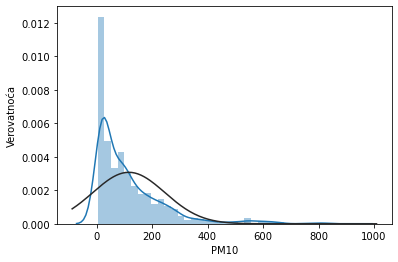

In [21]:
import seaborn as sb
from scipy.stats import norm
temp_europe = df_year.loc['2017','PM10']
sb.distplot(temp_europe, fit=norm)
plt.xlabel('PM10')
plt.ylabel('Verovatnoća')

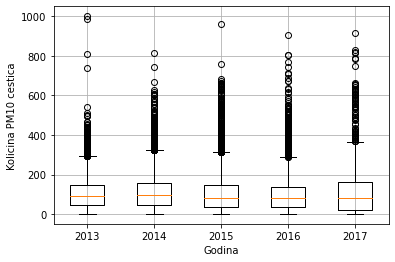

In [22]:
# boxplot

plt.boxplot([df_year.loc['2013','PM10'], df_year.loc['2014','PM10'], df_year.loc['2015','PM10'], df_year.loc['2016','PM10'], df_year.loc['2017','PM10']]) 
plt.ylabel('Kolicina PM10 cestica')
plt.xlabel('Godina')
plt.xticks([1, 2, 3, 4, 5], ["2013", "2014", "2015", "2016", "2017"])
plt.grid()

In [23]:
print('Medijan 2013:', np.median(df_year.loc['2013','PM10']))
print('Medijan 2014:', np.median(df_year.loc['2014','PM10']))
print('Medijan 2015:', np.median(df_year.loc['2015','PM10']))
print('Medijan 2016:', np.median(df_year.loc['2016','PM10']))
print('Medijan 2017:', np.median(df_year.loc['2017','PM10']))

Medijan 2013: 91.0
Medijan 2014: 96.0
Medijan 2015: 84.5
Medijan 2016: 84.0
Medijan 2017: 80.0


In [24]:
print('Srednja vrednost 2013:', np.mean(df_year.loc['2013','PM10']))
print('Srednja vrednost 2014:', np.mean(df_year.loc['2014','PM10']))
print('Srednja vrednost 2015:', np.mean(df_year.loc['2015','PM10']))
print('Srednja vrednost 2016:', np.mean(df_year.loc['2016','PM10']))
print('Srednja vrednost 2017:', np.mean(df_year.loc['2017','PM10']))

#srednja vrednost se nece analizirati zbog uticaja outliera, zato se vise oslanjamo na medijan

Srednja vrednost 2013: 107.50238322211631
Srednja vrednost 2014: 115.51033340945423
Srednja vrednost 2015: 106.16090929860634
Srednja vrednost 2016: 104.40144148266789
Srednja vrednost 2017: 116.33309196234613


In [25]:
print('Dinamicki opseg 2013:', np.max(df_year.loc['2013','PM10']) - np.min(df_year.loc['2013','PM10']))
print('Dinamicki opseg 2014:', np.max(df_year.loc['2014','PM10']) - np.min(df_year.loc['2014','PM10']))
print('Dinamicki opseg 2015:', np.max(df_year.loc['2015','PM10']) - np.min(df_year.loc['2015','PM10']))
print('Dinamicki opseg 2016:', np.max(df_year.loc['2016','PM10']) - np.min(df_year.loc['2016','PM10']))
print('Dinamicki opseg 2017:', np.max(df_year.loc['2017','PM10']) - np.min(df_year.loc['2017','PM10']))

#opet zbog prisustva outliera necemo ga uzimati u obzir

Dinamicki opseg 2013: 997.0
Dinamicki opseg 2014: 811.0
Dinamicki opseg 2015: 958.0
Dinamicki opseg 2016: 903.0
Dinamicki opseg 2017: 913.0


In [26]:
print('Interkvartilni opseg (IQR) 2013:', np.percentile(df_year.loc['2013','PM10'], 75)- np.percentile(df_year.loc['2013','PM10'],25))
print('Interkvartilni opseg (IQR) 2014:', np.percentile(df_year.loc['2014','PM10'], 75)- np.percentile(df_year.loc['2014','PM10'],25))
print('Interkvartilni opseg (IQR) 2015:', np.percentile(df_year.loc['2015','PM10'], 75)- np.percentile(df_year.loc['2015','PM10'],25))
print('Interkvartilni opseg (IQR) 2016:', np.percentile(df_year.loc['2016','PM10'], 75)- np.percentile(df_year.loc['2016','PM10'],25))
print('Interkvartilni opseg (IQR) 2017:', np.percentile(df_year.loc['2017','PM10'], 75)- np.percentile(df_year.loc['2017','PM10'],25))

Interkvartilni opseg (IQR) 2013: 99.0
Interkvartilni opseg (IQR) 2014: 110.0
Interkvartilni opseg (IQR) 2015: 111.0
Interkvartilni opseg (IQR) 2016: 101.0
Interkvartilni opseg (IQR) 2017: 137.0


In [27]:
gb = df.groupby(by=['year', 'month']).mean()
gb

#uvid u prosecnu mesecnu promenu kolicine PM10 cestica

day  hour  PM2.5   PM10   SO2   NO2      CO     O3  TEMP    PRES  \
year month                                                                      
2013 3     16.00 11.50 102.72 128.73 45.54 73.61 1474.46  59.43  6.05 1012.55   
     4     15.50 11.50  59.49  96.03 22.55 52.82  924.65  61.71 12.26 1008.30   
     5     16.00 11.50  80.28 133.14 28.38 54.72  942.30  84.23 21.37 1003.16   
     6     15.50 11.50 106.66 122.04 14.30 49.47 1323.05  72.32 23.39 1000.17   
     7     16.00 11.50  67.94  79.97  9.69 42.91  881.03  75.82 26.88  996.03   
     8     16.00 11.50  61.56  82.04  7.19 45.25  732.39  83.24 26.74  999.32   
     9     15.50 11.50  79.91  99.98  9.90 56.97 1103.74  47.43 20.08 1009.36   
     10    16.00 11.50  96.55 119.94 15.19 71.04 1208.87  29.28 12.81 1016.27   
     11    15.49 11.51  79.45 105.87 24.64 63.87 1461.47  29.22  5.54 1016.97   
     12    16.00 11.50  83.42 107.08 39.70 69.90 1317.20  24.93 -0.16 1019.95   
2014 1     16.00 11.50 100.47 132.31 55.22 74.45 1940.73  16.52 -0.14 1020.05   
     2     14.50 11.50 142.38 150.00 59.35 72.79 2099.85  20.68 -0.10 1022.39   
     3     16.00 11.50  94.37 133.32 37.78 73.94 1407.26  43.60  9.92 1013.73   
     4     15.50 11.50  90.04 137.02 18.42 67.53  932.64  72.87 16.89 1010.46   
     5     16.00 11.50  63.46 124.12 15.63 57.65  990.59  87.90 21.18 1001.56   
     6     15.50 11.50  59.50  76.40  7.28 45.46  980.42  98.63 24.59  999.99   
     7     16.02 11.51  87.13 109.86  7.62 42.13 1062.05  96.63 27.81  998.37   
     8     16.00 11.50  72.18  87.78  5.32 50.45  946.24  93.50 25.82 1002.48   
     9     15.51 11.49  70.52  88.33  7.31 58.29 1090.40  53.05 20.77 1008.64   
     10    16.00 11.50 128.35 147.65  8.56 77.07 1374.19  27.86 13.57 1014.64   
     11    15.50 11.50  88.17 117.02 19.12 78.54 1659.44  19.48  5.94 1020.32   
     12    16.00 11.50  59.82  84.21 33.16 64.67 1655.51  23.62 -0.65 1024.08   
2015 1     15.99 11.49  94.62 105.69 38.31 76.88 1887.62  19.04 -0.70 1021.97   
     2     14.49 11.51  93.37 114.83 29.56 61.89 1482.27  31.74  1.23 1018.51   
     3     16.00 11.50  85.03 136.38 22.61 59.35 1193.95  45.41  8.44 1016.87   
     4     15.50 11.50  72.78 119.18  9.68 47.28  813.61  75.95 15.63 1010.87   
     5     16.00 11.50  55.59 107.03  8.90 40.22  760.08  94.18 21.46 1003.45   
     6     15.50 11.50  62.16  83.69  6.54 39.12 1174.17  91.59 24.54 1000.35   
     7     16.00 11.49  67.52  80.53  5.34 40.02  973.62  99.57 26.40 1001.28   
     8     16.00 11.50  51.33  69.86  3.45 40.09  888.17  97.02 26.44 1003.40   
     9     15.50 11.50  53.41  68.65  5.35 46.91  876.53  60.84 20.60 1011.35   
     10    15.98 11.49  74.83  93.93  6.02 58.58  953.17  37.98 14.33 1015.72   
     11    15.50 11.50 120.75 128.36 10.92 64.69 1936.11  11.78  2.85 1023.43   
     12    16.00 11.50 153.95 165.78 22.61 83.35 2800.67  12.81 -0.36 1024.07   
2016 1     16.00 11.50  67.29  84.96 23.46 56.94 1488.44  23.15 -4.55 1025.95   
     2     15.01 11.51  41.21  57.01 15.04 40.08  918.99  43.39  1.41 1022.57   
     3     16.01 11.51  94.44 143.01 19.07 62.15 1247.91  43.94  9.21 1016.74   
     4     15.50 11.50  73.47 128.23 11.09 47.24  791.94  69.31 16.45 1007.81   
     5     16.01 11.49  57.04  99.80  9.80 41.06  731.94  92.60 21.70 1005.52   
     6     15.50 11.50  66.21  86.17  5.79 40.30  831.11 107.87 25.74 1000.76   
     7     15.99 11.51  76.85  86.89  4.98 38.33  931.09  92.50 27.70 1000.64   
     8     15.99 11.51  49.13  65.57  3.96 41.06  865.55  80.78 27.88 1003.58   
     9     15.32 11.46  57.33  76.55  4.02 51.67  801.43  55.45 22.29 1009.29   
     10    15.96 11.58  86.81 110.49  5.19 63.66 1165.99  21.91 13.40 1017.16   
     11    15.56 11.54 106.87 146.84 13.52 71.33 1697.06  13.32  4.43 1020.59   
     12    16.03 11.47 142.81 164.75 21.65 86.59 2490.68  14.80  0.65 1023.47   
2017 1     15.86 11.52 110.57 141.39 20.99 71.29 1915.17  41.60 -1.09 1025.04   
     2     14.51 11.52  71.42  89.66 20.49 5

Text(0.5, 0, 'Meseci')

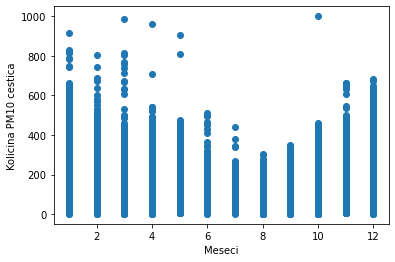

In [28]:
plt.scatter(df['month'], df['PM10'])
plt.ylabel('Kolicina PM10 cestica')
plt.xlabel('Meseci')
# kolicina cestica znatno opada oko avgusta
# pretpostavka: ljudi uzimaju godisnji u tom periodu te ne idu na posao ili uopste nisu prisutni

Text(0.5, 0, 'Meseci')

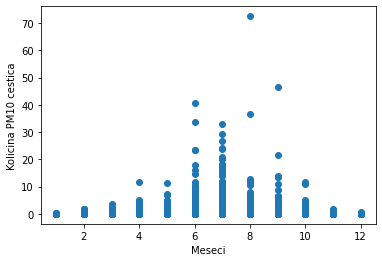

In [29]:
plt.scatter(df['month'], df['RAIN'])
plt.ylabel('Kolicina PM10 cestica')
plt.xlabel('Meseci')

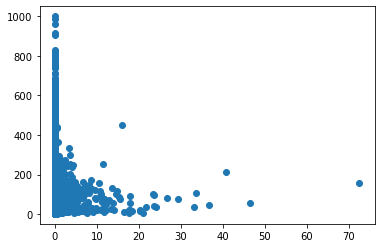

In [30]:
plt.scatter(df['RAIN'], df['PM10'])

# kada nema kise onda su cestice najprisutnije u vazduhu, inace kada pada onda ih nema ili su prisutne u mnogo manjih kolicinama

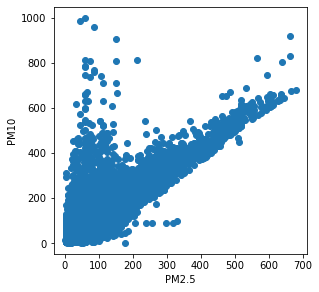

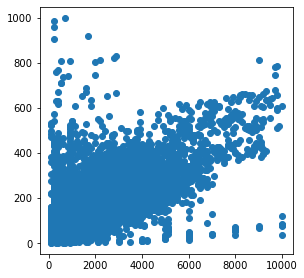

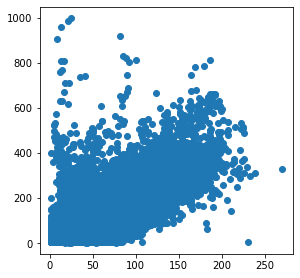

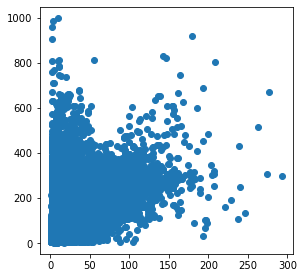

In [31]:
plt.figure(figsize=(10, 10))
ax1=plt.subplot(2, 2, 1)
plt.scatter(df['PM2.5'], df['PM10'])
plt.ylabel('PM10')
plt.xlabel('PM2.5')

plt.figure(figsize=(10, 10))
ax2=plt.subplot(2,2,2)
plt.scatter(df['CO'], df['PM10'])

# po graficima vidimo da je cestica PM10 veoma korelisana sa PM2.5 i CO, jer su vrednosti bliske y=x

plt.figure(figsize=(10, 10))
ax2=plt.subplot(2,2,4)
plt.scatter(df['NO2'], df['PM10'])

plt.figure(figsize=(10, 10))
ax2=plt.subplot(2,2,3)
plt.scatter(df['SO2'], df['PM10'])

# NO2 jos ima dosta veliku korelaciju sa PM10, dok kod SO2 se vec ne vidi toliko zavisnost

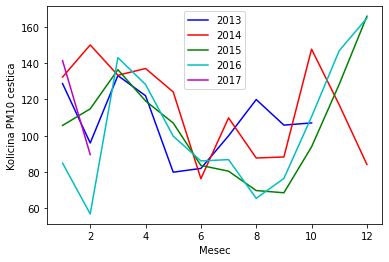

In [32]:
gb = df.groupby(by=['year', 'month']).mean()
PM2013 = gb.loc[2013]['PM10']
PM2014 = gb.loc[2014]['PM10']
PM2015 = gb.loc[2015]['PM10']
PM2016 = gb.loc[2016]['PM10']
PM2017 = gb.loc[2017]['PM10']
plt.plot(np.arange(1, 11, 1), PM2013, 'b', label='2013') 
plt.plot(np.arange(1, 13, 1), PM2014, 'r', label='2014')
plt.plot(np.arange(1, 13, 1), PM2015, 'g', label='2015')
plt.plot(np.arange(1, 13, 1), PM2016, 'c', label='2016')
plt.plot(np.arange(1, 3, 1), PM2017, 'm', label='2017')
plt.ylabel('Kolicina PM10 cestica')
plt.xlabel('Mesec')
plt.legend();

# morali smo da pazimo kod 2013. godine, jer je tu belezenje krenulo tek od treceg meseca
# i kod 2017. godine jer su tu zabelezena samo prva dva meseca

In [33]:
# df_month = pd.DataFrame()
# for i in df_year.index.unique():
#     df_month[i] = gb.loc[i, 'PM10']
# c=df_month['2013'].corr(df_month['2017'])
# print("korelacija: %.3f" % c)

In [34]:
# matrica_korelacije = df_month.corr() 
# print(matrica_korelacije['2017'])

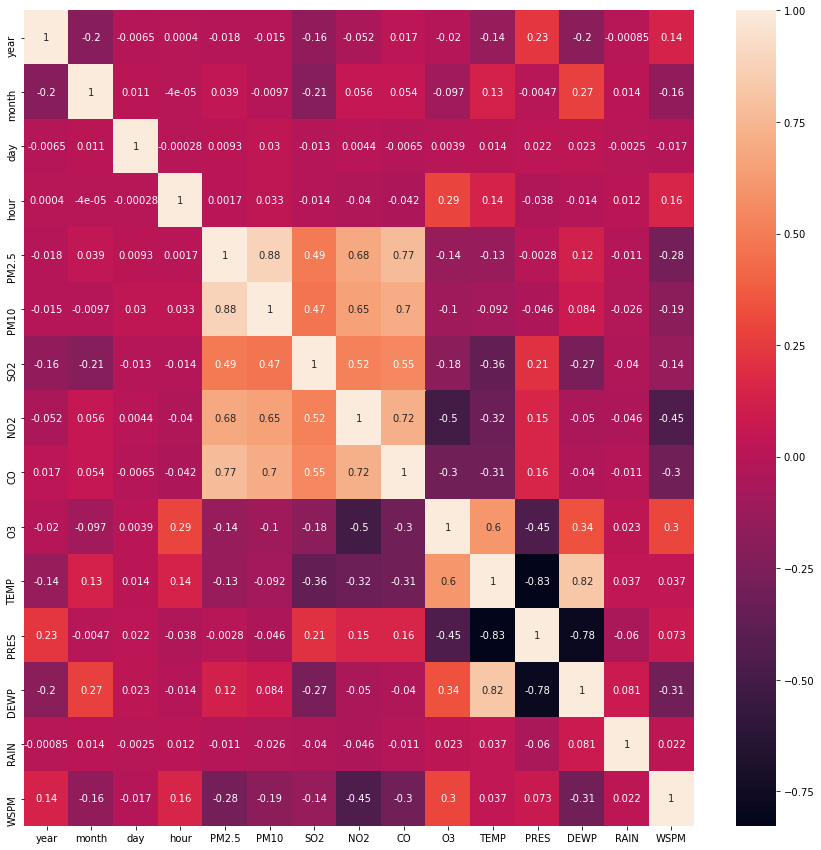

In [35]:
matrica_korelacije = df.corr()
f = plt.figure(figsize=(15, 15))

sb.heatmap(matrica_korelacije, annot=True);

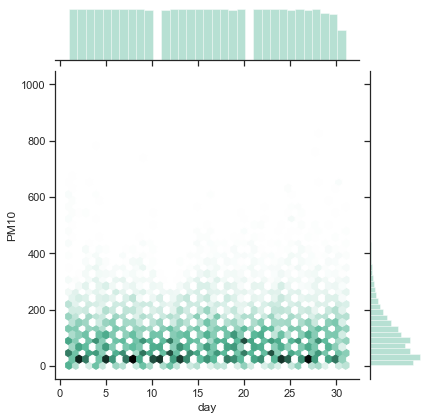

In [36]:
#dodatna vizuelizacija

sb.set(style="ticks")

sb.jointplot(x=df['day'], y=df['PM10'], kind="hex", color="#4CB391")

# vidimo da se najmanje javlja PM10 31og
# razlog: nema svaki mesec 31. dan
# ostali dani imaju uniformnu raspodelu

In [37]:
# REGRESIJA
# potrebno je izdvojiti 10% nasumicno izabranih uzoraka kao test skup, a preostalih 90% koristimo za pravljenje modela

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets

In [39]:
x = df
x.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.00,4.00,14.00,20.00,300.00,69.00,-0.70,1023.00,-18.80,0.00,NNW,4.40
1,2013,3,1,1,4.00,4.00,13.00,17.00,300.00,72.00,-1.10,1023.20,-18.20,0.00,N,4.70
2,2013,3,1,2,3.00,3.00,10.00,19.00,300.00,69.00,-1.10,1023.50,-18.20,0.00,NNW,5.60
3,2013,3,1,3,3.00,6.00,7.00,24.00,400.00,62.00,-1.40,1024.50,-19.40,0.00,NW,3.10
4,2013,3,1,4,3.00,6.00,5.00,14.00,400.00,71.00,-2.00,1025.20,-19.50,0.00,N,2.00


In [40]:
print(x['wd'].unique())

['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW']


In [41]:
lista = ['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE', 'WNW', 'SSE', 'ESE', 'S', 'SW']
w = sorted(lista)
print(w)

['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW']


In [42]:
# prebacujemo wd u numericke vrednosti, posto kategorije ne mozemo da primenimo u linearnoj regresiji
# posto nismo strucnjaci i ne znamo sta oznake za pravac vetra znace, mozemo jedino na osnovu njihovog naziva da ih sortiramo
# u nadi da cemo tako doprineti nekom skladu
x.loc[x['wd']=='E','wd']=1
x.loc[x['wd']=='ENE','wd']=2
x.loc[x['wd']=='ESE','wd']=3
x.loc[x['wd']=='N','wd']=4
x.loc[x['wd']=='NE','wd']=5
x.loc[x['wd']=='NNE','wd']=6
x.loc[x['wd']=='NNW','wd']=7
x.loc[x['wd']=='NW','wd']=8
x.loc[x['wd']=='S','wd']=9
x.loc[x['wd']=='SE','wd']=10
x.loc[x['wd']=='SSE','wd']=11
x.loc[x['wd']=='SSW','wd']=12
x.loc[x['wd']=='SW','wd']=13
x.loc[x['wd']=='W','wd']=14
x.loc[x['wd']=='WNW','wd']=15
x.loc[x['wd']=='WSW','wd']=16
print(x['wd'].unique())
x.head()

[7 4 8 6 2 1 5 14 12 16 10 15 11 3 9 13]


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.00,4.00,14.00,20.00,300.00,69.00,-0.70,1023.00,-18.80,0.00,7,4.40
1,2013,3,1,1,4.00,4.00,13.00,17.00,300.00,72.00,-1.10,1023.20,-18.20,0.00,4,4.70
2,2013,3,1,2,3.00,3.00,10.00,19.00,300.00,69.00,-1.10,1023.50,-18.20,0.00,7,5.60
3,2013,3,1,3,3.00,6.00,7.00,24.00,400.00,62.00,-1.40,1024.50,-19.40,0.00,8,3.10
4,2013,3,1,4,3.00,6.00,5.00,14.00,400.00,71.00,-2.00,1025.20,-19.50,0.00,4,2.00


In [43]:
y = df['PM10']
x = df.drop(['PM10'], axis = 1)

In [44]:
x.describe()

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00,34977.00
mean,2014.66,6.52,15.72,11.50,82.49,17.46,57.73,1252.15,55.34,13.60,1011.84,3.13,0.07,1.71
std,1.18,3.45,8.80,6.92,80.29,23.46,34.83,1138.30,56.54,11.40,10.40,13.69,0.91,1.20
min,2013.00,1.00,1.00,0.00,2.00,1.00,2.00,100.00,0.21,-16.80,985.90,-35.30,0.00,0.00
25%,2014.00,4.00,8.00,6.00,24.00,3.00,31.00,600.00,8.00,3.20,1003.20,-8.10,0.00,0.90
50%,2015.00,7.00,16.00,12.00,59.00,8.00,51.00,900.00,41.00,14.60,1011.40,3.80,0.00,1.40
75%,2016.00,10.00,23.00,17.00,113.00,21.00,78.00,1500.00,79.25,23.30,1020.10,15.60,0.00,2.20
max,2017.00,12.00,31.00,23.00,680.00,293.00,270.00,10000.00,415.00,40.50,1042.00,28.50,72.50,11.20


In [45]:
y.describe()

count   34977.00
mean      108.75
std        91.06
min         2.00
25%        41.00
50%        89.00
75%       148.00
max       999.00
Name: PM10, dtype: float64

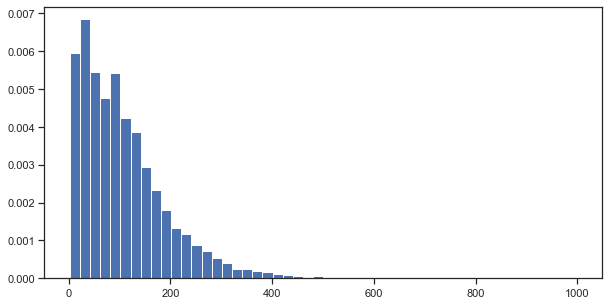

In [46]:
plt.figure(figsize=(10,5))
plt.hist(y, density=True, bins=50)
plt.show()

In [47]:
def model_evaluation(y, y_predicted, N, d):
    
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    rmse = np.sqrt(mse)
    
    r2 = r2_score(y_test, y_predicted) # max 1 min 0
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1) #prilagodjeni R skor

    print('MSE: ', mse)
    print('MAE: ', mae)
    print('RMSE: ', rmse)
    print('R2 skor: ', r2)
    print('R2 prilagodjeni skor: ', r2_adj)
    
    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(15))
    
    return mse

In [48]:
linreg = pd.DataFrame(columns = ['tip','model','RMSE'])

In [49]:
#podela na trening i test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1,  shuffle = True, random_state = 15)

MSE:  1502.9838873011238
MAE:  23.020388292512905
RMSE:  38.76833614305782
R2 skor:  0.8138374126219262
R2 prilagodjeni skor:  0.8137486595211199
        y  y_pred
0  176.00  204.17
1  364.00  395.28
2  207.00  198.78
3   18.00   56.96
4  206.00  230.17
5  169.00  160.09
6   52.00   63.52
7  380.00  376.82
8   27.00   35.37
9  271.00  260.18
10 118.00  108.61
11 169.00  137.38
12 317.00  339.92
13  86.00   54.28
14 100.00  112.26
koeficijenti:  [ 3.35246701e-01 -2.77164165e-01  2.88029852e-01  2.80581944e-02
  8.96457007e-01 -2.35822082e-02  4.69313369e-01  2.59332136e-03
  5.88930210e-02  5.56362124e-01 -9.70780605e-01 -8.86258170e-01
 -1.03811320e+00  9.79275526e-02  5.75540771e+00]
   tip                                   model                 RMSE
0  [0]  [Linearna regresija bez normalizacije]  [38.76833614305782]


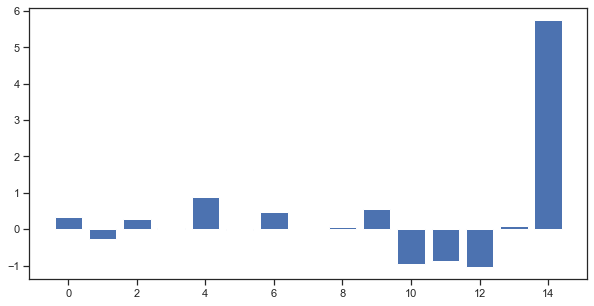

In [50]:
# REGRESIJA 1 - obicna linearna regresija
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn

regression_model = LinearRegression(fit_intercept=True) # inicijalizacija
regression_model.fit(x_train, y_train) # obuka
y_predicted = regression_model.predict(x_test) # testiranje

mse = model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1]) # evaluacija

# ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model.coef_)),regression_model.coef_)
print("koeficijenti: ", regression_model.coef_)

rmse = np.sqrt(mse)
data = {'tip': ['0'], 'model':['Linearna regresija bez normalizacije'], 'RMSE':[rmse]}
linreg = linreg.append(data, ignore_index=True)
print(linreg)

In [51]:
# Selekcija obelezja
import statsmodels.api as sm
X = sm.add_constant(x_train)
model = sm.OLS(y_train, X.astype(float) ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     8769.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:04:01   Log-Likelihood:            -1.6084e+05
No. Observations:               31479   AIC:                         3.217e+05
Df Residuals:                   31463   BIC:                         3.218e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        290.1041    429.081      0.676      0.499    -550.911    1131.119
year           0.3352      0.217      1.545      0.122      -0.090       0.760
month         -0.2772      0.077     -3.579      0.000      -0.429      -0.125
day            0.2880      0.026     11.183      0.000       0.238       0.339
hour           0.0281      0.036      0.782      0.434      -0.042       0.098
PM2.5          0.8965      0.005    176.971      0.000       0.887       0.906
SO2           -0.0236      0.014     -1.701      0.089      -0.051       0.004
NO2            0.4693      0.012     38.072      0.000       0.445       0.493
CO             0.0026      0.000      7.122      0.000       0.002       0.003
O3             0.0589      0.006      9.144      0.000       0.046       0.072
TEMP           0.5564      0.057      9.728      0.000       0.444       0.668
PRES          -0.9708      0.044    -21.929      0.000      -1.058      -0.884
DEWP          -0.8863      0.043    -20.478      0.000      -0.971      -0.801
RAIN          -1.0381      0.244     -4.262      0.000      -1.515      -0.561
wd             0.0979      0.052      1.878      0.060      -0.004       0.200
WSPM           5.7554      0.251     22.927      0.000       5.263       6.247
==============================================================================
Omnibus:                    34956.334   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6105518.629
Skew:                           5.479   Prob(JB):                         0.00
Kurtosis:                      70.341   Cond. No.                     5.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# primecujemo da postoji nekoliko obelezja cije su vrednosti vece od 0.01
# te vrednosti uklanjamo pre nego sto nastavimo sa regresijom

x = x.drop(['year'], axis=1)
x = x.drop(['hour'], axis=1)
x = x.drop(['SO2'], axis=1)
x = x.drop(['wd'], axis=1)

x_train = x_train.drop(['year'], axis=1)
x_train = x_train.drop(['hour'], axis=1)
x_train = x_train.drop(['SO2'], axis=1)
x_train = x_train.drop(['wd'], axis=1)

x_test = x_test.drop(['year'], axis=1)
x_test = x_test.drop(['hour'], axis=1)
x_test = x_test.drop(['SO2'], axis=1)
x_test = x_test.drop(['wd'], axis=1)

In [53]:
# treba da izvrsimo normalizaciju da bismo mogli realno da procenimo situaciju
# i da bismo povecali koeficijent konvergencije

In [58]:
s = StandardScaler()
s.fit(x_train)
x_train_std = s.transform(x_train)
x_test_std = s.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

,month,day,PM2.5,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,0.14,0.83,-0.29,-1.20,0.22,2.15,1.53,-1.46,1.76,-0.07,0.40
1,1.59,0.60,-0.75,-0.77,-0.49,-0.13,-0.95,0.40,-1.47,-0.07,1.81
2,-0.73,-0.65,-0.85,-1.11,-0.92,0.56,-0.17,0.14,-0.80,-0.07,1.07
3,-0.44,-0.31,-0.74,-0.57,-0.66,0.67,0.63,0.30,-0.04,-0.07,-0.01
4,-0.44,-0.99,-0.73,-1.31,-0.84,1.39,1.13,0.00,-0.89,-0.07,1.07


MSE:  1502.6017118123818
MAE:  23.011854803508104
RMSE:  38.76340686539796
R2 skor:  0.8138847496415827
R2 prilagodjeni skor:  0.8138196888555548
        y  y_pred
0  176.00  204.34
1  364.00  394.53
2  207.00  199.64
3   18.00   56.39
4  206.00  228.13
5  169.00  159.93
6   52.00   62.57
7  380.00  376.75
8   27.00   36.15
9  271.00  258.59
10 118.00  108.32
11 169.00  137.32
12 317.00  340.12
13  86.00   54.36
14 100.00  113.26
koeficijenti:  [ -0.95841703   2.53120924  72.06828879  16.29077161   2.79438753
   3.42185193   6.63251154  -9.84478586 -12.0926256   -0.96902547
   7.01356493]
    tip                                   model                 RMSE
0   [0]  [Linearna regresija bez normalizacije]  [38.76833614305782]
1  [1a]  [Linearna regresija sa normalizacijom]  [38.76340686539796]
2  [1a]  [Linearna regresija sa normalizacijom]  [38.76340686539796]
3  [1a]  [Linearna regresija sa normalizacijom]  [38.76340686539796]


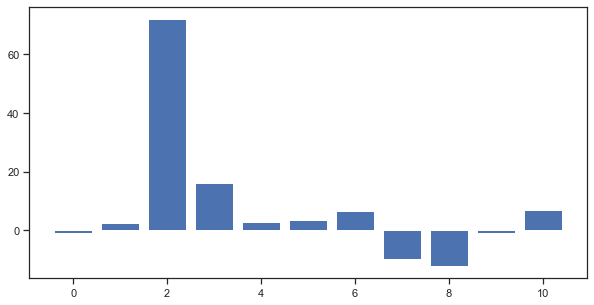

In [59]:
# REGRESIJA 1a - linearna regresija sa normalizacijom
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn

regression_model_std = LinearRegression() # inicijalizacija
regression_model_std.fit(x_train_std, y_train) # obuka
y_predicted = regression_model_std.predict(x_test_std) # testiranje

mse = model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1]) # evaluacija

# ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_std.coef_)),regression_model_std.coef_)
print("koeficijenti: ", regression_model_std.coef_)

rmse = np.sqrt(mse)
data = {'tip': ['1a'], 'model':['Linearna regresija sa normalizacijom'], 'RMSE':[rmse]}
linreg = linreg.append(data, ignore_index=True)
print(linreg)

MSE:  1502.6228943691951
MAE:  23.01097414899697
RMSE:  38.76368009321606
R2 skor:  0.8138821259277712
R2 prilagodjeni skor:  0.8138170642245648
        y  y_pred
0  176.00  204.34
1  364.00  394.44
2  207.00  199.68
3   18.00   56.38
4  206.00  228.11
5  169.00  159.90
6   52.00   62.59
7  380.00  376.68
8   27.00   36.17
9  271.00  258.58
10 118.00  108.32
11 169.00  137.32
12 317.00  340.09
13  86.00   54.33
14 100.00  113.28
koeficijenti:  [ -0.96178515   2.530849    72.0336148   16.29841869   2.81319929
   3.4294361    6.61321845  -9.83914518 -12.06545626  -0.97004538
   7.01758462]
    tip                                   model                 RMSE
0   [0]  [Linearna regresija bez normalizacije]  [38.76833614305782]
1  [1a]  [Linearna regresija sa normalizacijom]  [38.76340686539796]
2  [1a]  [Linearna regresija sa normalizacijom]  [38.76340686539796]
3  [1a]  [Linearna regresija sa normalizacijom]  [38.76340686539796]
4  [1b]                       [Ridge regresija]  [38.7636800

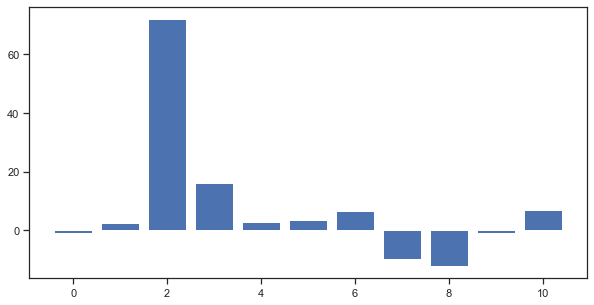

In [62]:
# REGRESIJA 1b - Ridge regresija

ridge_model = Ridge(alpha=5) # inicijalizacija
ridge_model.fit(x_train_std, y_train) # obuka 
y_predicted = ridge_model.predict(x_test_std) # testiranje

mse = model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1]) # evaluacija

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

rmse = np.sqrt(mse)
data = {'tip': ['1b'], 'model':['Ridge regresija'], 'RMSE':[rmse]}
linreg = linreg.append(data, ignore_index=True)
print(linreg)

MSE:  1502.61543066096
MAE:  23.008753440814445
RMSE:  38.76358382117113
R2 skor:  0.8138830503975863
R2 prilagodjeni skor:  0.8138179890175493
        y  y_pred
0  176.00  204.33
1  364.00  394.49
2  207.00  199.63
3   18.00   56.35
4  206.00  228.11
5  169.00  159.90
6   52.00   62.61
7  380.00  376.75
8   27.00   36.20
9  271.00  258.60
10 118.00  108.29
11 169.00  137.29
12 317.00  340.06
13  86.00   54.26
14 100.00  113.24
koeficijenti:  [ -0.96016142   2.51997646  72.06111767  16.2756822    2.77889384
   3.4224317    6.55228218  -9.82439061 -11.99955212  -0.96344608
   7.01924349]
    tip                                   model                 RMSE
0   [0]  [Linearna regresija bez normalizacije]  [38.76833614305782]
1  [1a]  [Linearna regresija sa normalizacijom]  [38.76340686539796]
2  [1a]  [Linearna regresija sa normalizacijom]  [38.76340686539796]
3  [1a]  [Linearna regresija sa normalizacijom]  [38.76340686539796]
4  [1b]                       [Ridge regresija]  [38.76368009

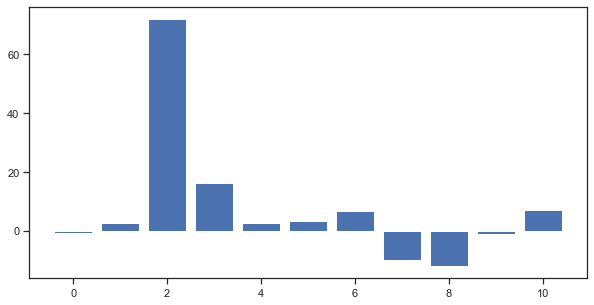

In [63]:
# REGRESIJA 1c - Lasso regresija 

lasso_model = Lasso(alpha=0.01) # inicijalizacija
lasso_model.fit(x_train_std, y_train) # obuka
y_predicted = lasso_model.predict(x_test_std) # testiranje

mse = model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1]) # evaluacija

#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

rmse = np.sqrt(mse)
data = {'tip': ['1c'], 'model':['Lasso regresija'], 'RMSE':[rmse]}
linreg = linreg.append(data, ignore_index=True)
print(linreg)

MSE:  1327.1735850481466
MAE:  21.84459724556487
RMSE:  36.430393698780506
R2 skor:  0.8356136279437729
R2 prilagodjeni skor:  0.8352682344458833
        y  y_pred
0  176.00  198.36
1  364.00  362.58
2  207.00  218.33
3   18.00   73.78
4  206.00  239.43
5  169.00  188.57
6   52.00   53.02
7  380.00  337.27
8   27.00   15.86
9  271.00  250.85
10 118.00  113.01
11 169.00  150.99
12 317.00  328.49
13  86.00   86.32
14 100.00  120.20
koeficijenti:  [-6.55631753e+00  1.73861482e+00  8.67079026e+01  1.07080275e+01
 -3.43902407e+00  1.16021882e+00  1.05902842e+01 -7.11155870e+00
 -1.33707746e+01  2.30957721e+00  1.34411107e+00 -7.43936254e-02
  5.99179203e+00 -1.67438452e+00 -3.56256883e+00 -2.87800378e+00
 -3.82839254e+00 -9.91972270e-01 -2.61485967e+00  4.11543175e-01
 -6.76621892e-01  3.04154681e+00  1.24975436e+00 -3.32437402e+00
 -1.19389212e-01  4.12947114e-01 -8.84778545e-01 -2.06990726e+00
  2.39745767e-01  2.07159798e+00 -1.08205745e+01 -2.14604239e+00
 -8.40960377e+00  9.15920394e+0

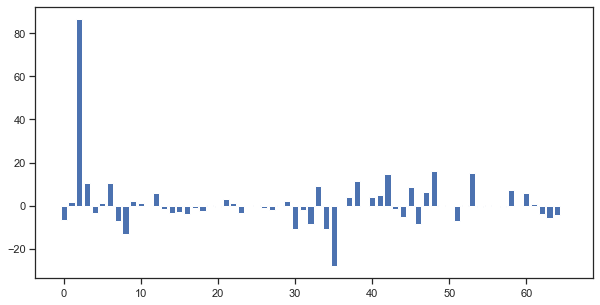

In [64]:
# REGRESIJA 2a - model linearne regresije sa hipotezom koja sadrzi interakcije medju obelezjima

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

regression_model_inter = LinearRegression() # inicijalizacija
regression_model_inter.fit(x_inter_train, y_train) # obuka modela
y_predicted = regression_model_inter.predict(x_inter_test) # testiranje

mse = model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1]) # evaluacija

# ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
print("koeficijenti: ", regression_model_inter.coef_)

rmse = np.sqrt(mse)
data = {'tip': ['2a'], 'model':['Polinomijalna regresija - 1. stepen'], 'RMSE':[rmse]}
linreg = linreg.append(data, ignore_index=True)
print(linreg)

MSE:  1327.3917946286222
MAE:  21.842133478858646
RMSE:  36.43338845933249
R2 skor:  0.8355866000691328
R2 prilagodjeni skor:  0.8352411497827633
        y  y_pred
0  176.00  198.36
1  364.00  362.71
2  207.00  218.34
3   18.00   73.80
4  206.00  239.27
5  169.00  188.35
6   52.00   53.03
7  380.00  337.66
8   27.00   15.92
9  271.00  250.92
10 118.00  112.98
11 169.00  150.99
12 317.00  328.55
13  86.00   86.22
14 100.00  120.21
koeficijenti:  [-6.56330022e+00  1.73716062e+00  8.65693869e+01  1.07432756e+01
 -3.37198153e+00  1.20012702e+00  1.04754828e+01 -7.10727790e+00
 -1.32454744e+01  1.95605284e+00  1.36277760e+00 -7.53155662e-02
  5.95223085e+00 -1.65358793e+00 -3.54341669e+00 -2.85159442e+00
 -3.84320250e+00 -9.87309265e-01 -2.60296687e+00  4.20967258e-01
 -6.72756413e-01  3.04202344e+00  1.24504047e+00 -3.32375682e+00
 -1.17828736e-01  4.03396731e-01 -8.85600873e-01 -2.06243320e+00
  2.35787526e-01  2.07204643e+00 -1.07951213e+01 -2.15186219e+00
 -8.33940168e+00  8.83856887e+0

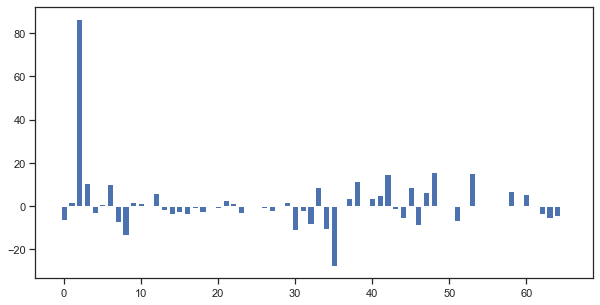

In [65]:
# REGRESIJA 2b - Ridge regresija

ridge_model = Ridge(alpha=5) # inicijalizacija
ridge_model.fit(x_inter_train, y_train) # obuka 
y_predicted = ridge_model.predict(x_inter_test) # testiranje

mse = model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1]) # evaluacija

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

rmse = np.sqrt(mse)
data = {'tip': ['2b'], 'model':['Ridge regresija'], 'RMSE':[rmse]}
linreg = linreg.append(data, ignore_index=True)
print(linreg)

MSE:  1327.205334362749
MAE:  21.83296313065643
RMSE:  36.430829449283046
R2 skor:  0.8356096954102282
R2 prilagodjeni skor:  0.8352642936496614
        y  y_pred
0  176.00  198.58
1  364.00  362.77
2  207.00  218.21
3   18.00   73.75
4  206.00  239.03
5  169.00  188.06
6   52.00   53.16
7  380.00  338.72
8   27.00   16.32
9  271.00  251.27
10 118.00  112.95
11 169.00  150.86
12 317.00  328.77
13  86.00   85.99
14 100.00  120.08
koeficijenti:  [-6.55758862e+00  1.72607053e+00  8.64367505e+01  1.06960927e+01
 -3.23861995e+00  1.19564729e+00  1.01755986e+01 -7.09461983e+00
 -1.29068507e+01 -0.00000000e+00  1.40711159e+00 -7.40841478e-02
  5.80811678e+00 -1.54023326e+00 -3.46553839e+00 -2.65651198e+00
 -3.89044272e+00 -9.28702171e-01 -2.53584917e+00  2.27444957e-01
 -6.52269139e-01  3.00253990e+00  1.22448649e+00 -3.29551783e+00
 -5.72229006e-02  2.86885614e-01 -8.63252774e-01 -1.94755453e+00
  1.70767059e-01  2.06742249e+00 -1.07867940e+01 -2.14854898e+00
 -8.04039896e+00  8.22284757e+00

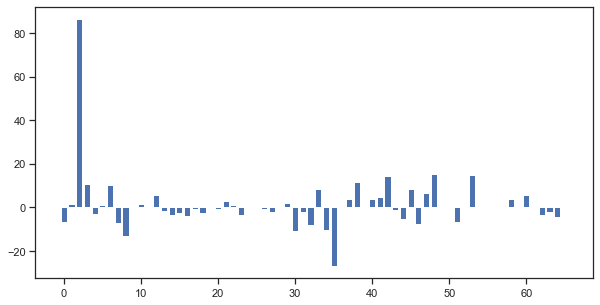

In [66]:
# REGRESIJA 2c - Lasso regresija

lasso_model = Lasso(alpha=0.01) # inicijalizacija
lasso_model.fit(x_inter_train, y_train) # obuka
y_predicted = lasso_model.predict(x_inter_test) # testiranje

mse = model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1]) # evaluacija

#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

rmse = np.sqrt(mse)
data = {'tip': ['2c'], 'model':['Lasso regresija'], 'RMSE':[rmse]}
linreg = linreg.append(data, ignore_index=True)
print(linreg)

MSE:  1323.1045807800376
MAE:  21.56373109286432
RMSE:  36.37450454343038
R2 skor:  0.8361176229426572
R2 prilagodjeni skor:  0.8357157585742163
        y  y_pred
0  176.00  196.55
1  364.00  374.54
2  207.00  224.04
3   18.00   72.13
4  206.00  236.94
5  169.00  188.60
6   52.00   55.14
7  380.00  351.06
8   27.00   15.94
9  271.00  252.03
10 118.00  114.40
11 169.00  151.85
12 317.00  322.41
13  86.00   75.89
14 100.00  127.27
koeficijenti:  [-5.66628908e+00  1.89357779e+00  8.27366269e+01  1.11746472e+01
 -2.28744161e+00  6.66057311e-01  1.25668469e+01 -6.79498706e+00
 -1.88229261e+01  2.89240492e+00  3.01914921e-01 -4.06208650e+00
 -4.37660226e-01  5.36056034e+00 -1.39794098e+00 -3.17230619e+00
 -1.37104766e+00 -6.34246035e+00 -1.56090603e+00 -1.98503896e-01
 -1.69829651e-01 -4.65281285e-01  8.37471173e-01  1.42934541e+00
  1.46664947e+00 -1.78028178e+00  3.02370104e-01  4.92858497e-02
 -1.55617473e+00 -1.96703258e+00  9.16466755e-02  2.37126863e+00
  4.25790985e+00 -1.29149877e+01

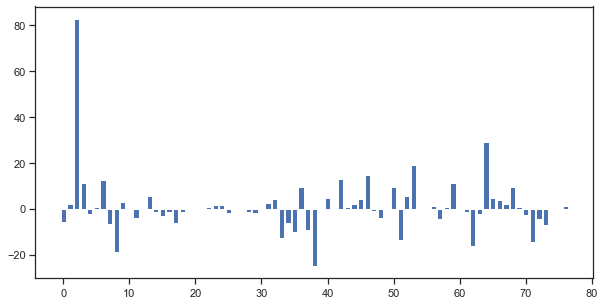

In [67]:
# REGRESIJA 3 - model linearne regresije sa hipotezom koja sadrzi interakcije medju obelezjima viseg stepena

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

regression_model_degree = LinearRegression()
regression_model_degree.fit(x_inter_train, y_train)
y_predicted = regression_model_degree.predict(x_inter_test)

mse = model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

# ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_degree.coef_)),regression_model_degree.coef_)
print("koeficijenti: ", regression_model_degree.coef_)

rmse = np.sqrt(mse)
data = {'tip': ['3a'], 'model':['Polinomijalna regresija - 2. stepen'], 'RMSE':[rmse]}
linreg = linreg.append(data, ignore_index=True)
print(linreg)

MSE:  1323.1951830436597
MAE:  21.559414637814452
RMSE:  36.37574993101393
R2 skor:  0.8361064007652536
R2 prilagodjeni skor:  0.8357045088783367
        y  y_pred
0  176.00  196.54
1  364.00  374.71
2  207.00  224.02
3   18.00   72.10
4  206.00  236.80
5  169.00  188.33
6   52.00   55.14
7  380.00  351.43
8   27.00   15.96
9  271.00  252.06
10 118.00  114.31
11 169.00  151.85
12 317.00  322.41
13  86.00   75.87
14 100.00  127.26
koeficijenti:  [-5.68183335e+00  1.89101590e+00  8.25835078e+01  1.12364921e+01
 -2.22335793e+00  7.23450505e-01  1.24030699e+01 -6.78475073e+00
 -1.86113134e+01  2.55424471e+00  3.36410313e-01 -4.03619349e+00
 -4.34445173e-01  5.33047341e+00 -1.38836814e+00 -3.14816417e+00
 -1.37473632e+00 -6.30392705e+00 -1.54735523e+00 -2.28104088e-01
 -1.58650317e-01 -4.65908336e-01  8.36244510e-01  1.42703855e+00
  1.46434108e+00 -1.77871458e+00  3.02998806e-01  3.76248039e-02
 -1.55445450e+00 -1.95547418e+00  8.78179958e-02  2.37160893e+00
  4.27377282e+00 -1.28927646e+0

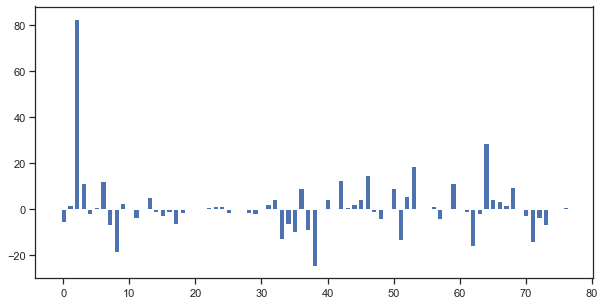

In [68]:
# REGRESIJA 3b - Ridge regresija

ridge_model = Ridge(alpha=5) # inicijalizacija
ridge_model.fit(x_inter_train, y_train) # obuka 
y_predicted = ridge_model.predict(x_inter_test) # testiranje

mse = model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1]) # evaluacija

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

rmse = np.sqrt(mse)
data = {'tip': ['3b'],'model':['Ridge regresija'], 'RMSE':[rmse]}
linreg = linreg.append(data, ignore_index=True)
print(linreg)

MSE:  1323.2162729843537
MAE:  21.55340440052053
RMSE:  36.37603981997427
R2 skor:  0.8361037885230596
R2 prilagodjeni skor:  0.8357018902305299
        y  y_pred
0  176.00  196.60
1  364.00  374.80
2  207.00  223.95
3   18.00   71.99
4  206.00  236.57
5  169.00  188.04
6   52.00   55.19
7  380.00  352.47
8   27.00   16.18
9  271.00  252.20
10 118.00  114.24
11 169.00  151.57
12 317.00  322.50
13  86.00   75.70
14 100.00  126.98
koeficijenti:  [-5.65212281e+00  1.87861852e+00  8.25221212e+01  1.12287829e+01
 -2.18887187e+00  7.36491867e-01  1.19957505e+01 -6.80371633e+00
 -1.81111624e+01 -0.00000000e+00  3.68341966e-01 -3.95165211e+00
 -4.22024114e-01  5.17764119e+00 -1.27038564e+00 -3.07166774e+00
 -1.23025539e+00 -6.29211011e+00 -1.45736933e+00 -1.61512028e-01
  0.00000000e+00 -4.28672800e-01  8.18851287e-01  1.40022107e+00
  1.41154674e+00 -1.73149588e+00  2.96866239e-01  0.00000000e+00
 -1.51162246e+00 -1.87054235e+00  2.10237975e-02  2.36339723e+00
  4.24475008e+00 -1.28483811e+01

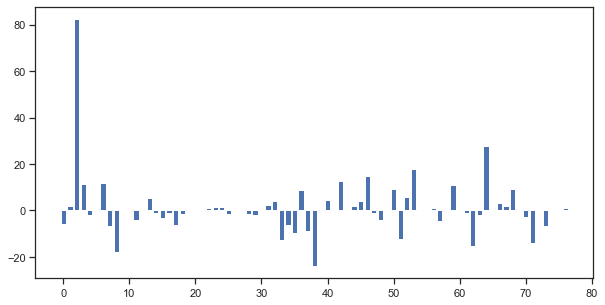

In [69]:
# REGRESIJA 3c - Lasso

lasso_model = Lasso(alpha=0.01) # inicijalizacija
lasso_model.fit(x_inter_train, y_train) # obuka
y_predicted = lasso_model.predict(x_inter_test) # testiranje

mse = model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1]) # evaluacija

#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

rmse = np.sqrt(mse)
data = {'tip': ['3c'], 'model':['Lasso regresija'], 'RMSE':[rmse]}
linreg = linreg.append(data, ignore_index=True)
print(linreg)

In [72]:
print(linreg)

     tip                                   model                  RMSE
0    [0]  [Linearna regresija bez normalizacije]   [38.76833614305782]
1   [1a]  [Linearna regresija sa normalizacijom]   [38.76340686539796]
2   [1a]  [Linearna regresija sa normalizacijom]   [38.76340686539796]
3   [1a]  [Linearna regresija sa normalizacijom]   [38.76340686539796]
4   [1b]                       [Ridge regresija]   [38.76368009321606]
5   [1c]                       [Lasso regresija]   [38.76358382117113]
6   [2a]   [Polinomijalna regresija - 1. stepen]  [36.430393698780506]
7   [2b]                       [Ridge regresija]   [36.43338845933249]
8   [2c]                       [Lasso regresija]  [36.430829449283046]
9   [3a]   [Polinomijalna regresija - 2. stepen]   [36.37450454343038]
10  [3b]                       [Ridge regresija]   [36.37574993101393]
11  [3c]                       [Lasso regresija]   [36.37603981997427]


In [73]:
print(min(linreg['RMSE']))

[36.37450454343038]


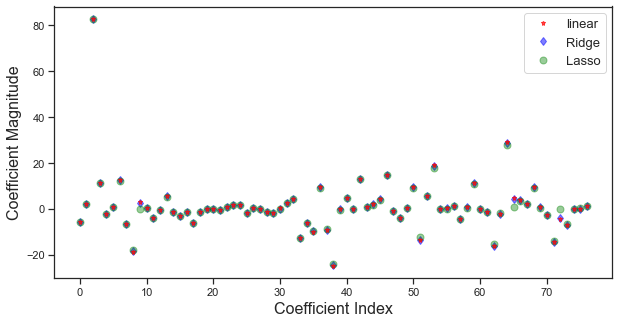

In [74]:
plt.figure(figsize=(10,5))
plt.plot(regression_model_degree.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'linear',zorder=7) # zorder for ordering the markers
plt.plot(ridge_model.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge') # alpha here is for transparency
plt.plot(lasso_model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Lasso')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='best')

In [ ]:
# mi na kraju biramo model sa najmanjim koeficijentima da bismo bili sigurni da se model nece prilagoditi